# 4.9 Intro to Data Visualization with Python

# Imports

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r"C:\Users\malac\Documents\Instacart Basket Analysis CF"

In [3]:
path

'C:\\Users\\malac\\Documents\\Instacart Basket Analysis CF'

In [4]:
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_2.pkl'))
#ords_prior and df_prods merge import

# 3.9 Reading

<AxesSubplot:>

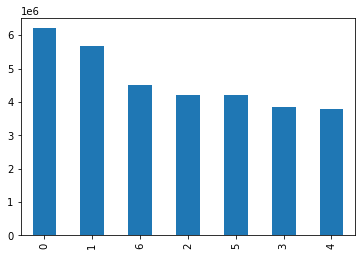

In [10]:
#Create a bar chart

ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<AxesSubplot:>

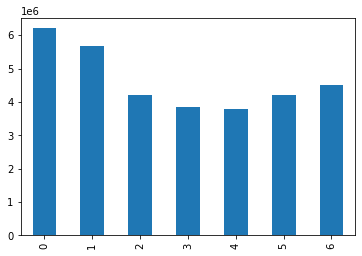

In [11]:
#Create a bar chart and realign axis

ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

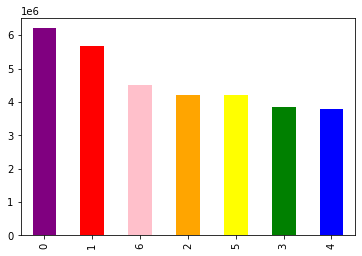

In [13]:
#Add color to bar chart and save it

bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

In [15]:
#Export bar chart 

bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

<AxesSubplot:ylabel='Frequency'>

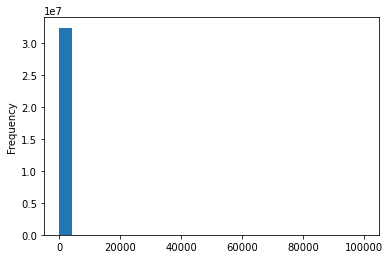

In [16]:
#Create histogram

ords_prods_merge['prices'].plot.hist(bins = 25)

<AxesSubplot:xlabel='prices', ylabel='prices'>

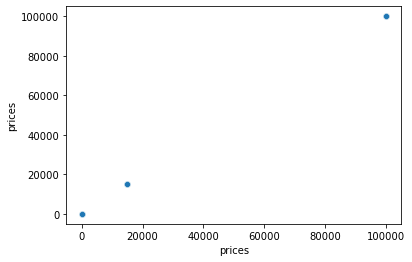

In [19]:
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [20]:
#Check for outliers

ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,Unnamed: 0_x,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,...,price_range_loc,busiest_day,Busiest_days,Busiest_period_of_day,max_order,loyalty_flag,total_spent,spending_flag,frequency,frequency_flag
10030345,171,912404,17,prior,12,2,14,5.0,21553,5,...,High-range product,Regularly busy,Regularly busy,Fewest orders,40,Regular customer,108.648299,Low spender,5.0,Non-frequent customer
10030346,181,603376,17,prior,22,6,16,4.0,21553,3,...,High-range product,Regularly busy,Regularly busy,Fewest orders,40,Regular customer,108.648299,Low spender,5.0,Non-frequent customer
10030347,1944,3264360,135,prior,2,2,21,13.0,21553,6,...,High-range product,Regularly busy,Regularly busy,Fewest orders,4,New customer,1154.792308,Low spender,12.0,Non-frequent customer
10030348,1945,892534,135,prior,3,0,8,12.0,21553,3,...,High-range product,Busiest day,Busiest day,Fewest orders,4,New customer,1154.792308,Low spender,12.0,Non-frequent customer
10030349,5708,229704,342,prior,8,1,19,30.0,21553,9,...,High-range product,Regularly busy,Regularly busy,Fewest orders,16,Regular customer,114.426619,Low spender,23.0,Frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,3386542,2249946,204099,prior,29,0,8,4.0,33664,1,...,High-range product,Busiest day,Busiest day,Fewest orders,39,Regular customer,1106.743956,Low spender,4.0,Non-frequent customer
29166210,3386544,2363282,204099,prior,31,0,9,2.0,33664,1,...,High-range product,Busiest day,Busiest day,Fewest orders,39,Regular customer,1106.743956,Low spender,4.0,Non-frequent customer
29166211,3391313,3181945,204395,prior,13,3,15,8.0,33664,25,...,High-range product,Regularly busy,Regularly busy,Fewest orders,15,Regular customer,451.153540,Low spender,5.0,Non-frequent customer
29166212,3405096,2486215,205227,prior,7,3,20,4.0,33664,8,...,High-range product,Regularly busy,Regularly busy,Fewest orders,12,Regular customer,1178.381871,Low spender,12.0,Non-frequent customer


In [21]:
#Turn outliers to NaNs

ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [22]:
ords_prods_merge['prices'].max()

25.0

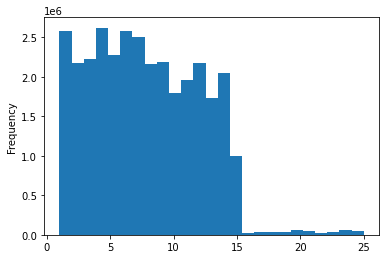

In [27]:
#Create histogram

hist = ords_prods_merge['prices'].plot.hist(bins = 25)

In [28]:
#Export histogram 

hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist1.png'))

In [5]:
#Create random sample in 'dev'
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [6]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [7]:
#Store %70 in big df

big = ords_prods_merge[dev]

In [8]:
#Store %30 in small df

small = ords_prods_merge[~dev]

In [9]:
len(ords_prods_merge)

32404859

In [10]:
len(big) + len(small)

32404859

In [11]:
df_2 = small[['orders_day_of_week','prices']]

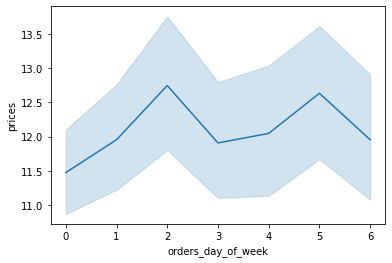

In [12]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')